# Assignment - Deep Neural Network - Classification

In this assignment, you will focus on housing. The data set (housing.csv) includes information about houses in each district in California. Predict the ocean proximity (`ocean_proximity` column) in the data set. This column determines whether the district is inland, near ocean, etc. This is a multi-class classification task. 

**The unit of analysis is a DISTRICT**



## Goal

Use the **housing.csv** data set and build the below models to predict **ocean_proximity**. 

## Submission:

Please save and submit this Jupyter notebook file. The correctness of the code is important. **Readability and organization of your code is also important.** Do not submit unreadable/undecipherable code. You may want to use markdown cells to create sections, and use comments where necessary.


# Read and Prepare the Data

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# Read the data and show the description of the data. 
housing= pd.read_csv("housing.csv")
print(housing.head())
print(housing.columns)
variable_descriptor = housing.describe()
variable_descriptor

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
      

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
#plan to process the data 
#checking any null values or missing data
#checking any duplicate data
housing = housing[housing.notnull()]
housing = housing[housing.duplicated()==0]
housing

#its same as before hence no missing or duplicate values

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


# Transform variable(s)

Transform at least one variable. For example, you can transform an existing variable (such as using a log transformation), or create a new variable from two existing variables.

#Plan to transform the data:
categorizing median income
creating new variables
Scaling and encoding of data for model processing
splitting training and testing 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013E259BBC08>,
      dtype=object)

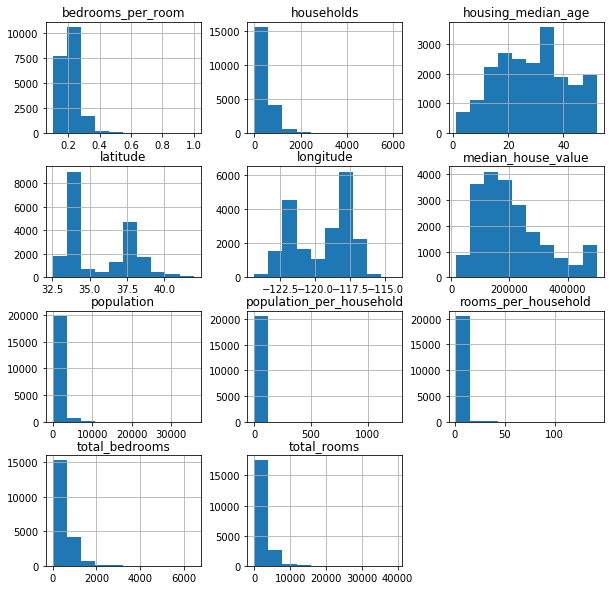

In [4]:
#categorising median income
housing["median_income"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


# creating new variables , population per household, rooms per household and bedrooms per household
housing["population_per_household"]=housing["population"]/housing["households"]
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]

#checking for log transformation we will draw distributions to see skewness
housing.hist(figsize = (10,10))
#its safe to assume after looking at the graph that our model wont be impacted by high skewness variables 
#so I wont perform any log transformation



In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

target = ['ocean_proximity']
    
# code to filter categorical column
categorical_columns = housing.nunique()[housing.nunique()<=6].keys().tolist()
categorical_columns = [x for x in categorical_columns if x not in target]

#code to filter numerical columns
numerical_columns =[x for x in housing.columns if x not in categorical_columns+ target]
label_encoder = LabelEncoder()
    
#category to numerical for efficient model building for target(ocean _proximity)
housing[target]= housing[target].astype(str)
housing[target]=label_encoder.fit_transform(housing[target])

#creating dummy variables for median_income category
housing = pd.get_dummies(data=housing, columns= categorical_columns)

#Normalizing numerical variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(housing[numerical_columns])
scaled_data = pd.DataFrame(scaled_data, columns= numerical_columns)

#creating a copy and merging numerical with categorical transformation variable
housing_copy = housing.copy()
housing = housing.drop(columns= numerical_columns, axis=1)
housing= housing.merge(scaled_data,left_index= True, right_index = True,how="left")


C:\Users\kitri\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#train test split

In [41]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

train,test = train_test_split(housing, test_size=0.25,random_state=42)

columns =[i for i in housing.columns if i not in target]
train_x = train[columns]
train_y = train[target]
test_x = test[columns]
test_y = test[target]

# DNNClassifier model

Use Tensorflow's DNNClassifier to predict the target variable. You can try deep networks.

In [ ]:
feat_longitude = tf.compat.v1.feature_column.numeric_column('longitude')
feat_median_income_1 = tf.compat.v1.feature_column.numeric_column('median_income_1')
feat_median_income_2 = tf.compat.v1.feature_column.numeric_column('median_income_2') 
feat_median_income_3 = tf.compat.v1.feature_column.numeric_column('median_income_3') 
feat_median_income_4 = tf.compat.v1.feature_column.numeric_column('median_income_4') 
feat_median_income_5 = tf.compat.v1.feature_column.numeric_column('median_income_5') 
feat_latitude = tf.compat.v1.feature_column.numeric_column('latitude')
feat_housing_median_age = tf.compat.v1.feature_column.numeric_column('housing_median_age')
feat_total_rooms = tf.compat.v1.feature_column.numeric_column('total_rooms')
feat_total_bedrooms = tf.compat.v1.feature_column.numeric_column('total_bedrooms')
feat_population = tf.compat.v1.feature_column.numeric_column('population')
feat_households = tf.compat.v1.feature_column.numeric_column('households')
feat_median_house_value = tf.compat.v1.feature_column.numeric_column('median_house_value')
feat_population_per_household = tf.compat.v1.feature_column.numeric_column('population_per_household')
feat_rooms_per_household = tf.compat.v1.feature_column.numeric_column('rooms_per_household')
feat_bedrooms_per_room = tf.compat.v1.feature_column.numeric_column('bedrooms_per_room')

feature_columns = [feat_longitude,
feat_median_income_1,
feat_median_income_2, 
feat_median_income_3,
feat_median_income_4, 
feat_median_income_5,
feat_latitude,
feat_housing_median_age,
feat_total_rooms,
feat_total_bedrooms,
feat_households,
feat_median_house_value,
feat_population_per_household,
feat_rooms_per_household,
feat_bedrooms_per_room]

In [42]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(train_x,
                                                 train_y,
                                                 batch_size= 50,
                                                 num_epochs=1000,
                                                 shuffle=True)

eval_func =tf.compat.v1.estimator.inputs.pandas_input_fn(test_x,
                                                 test_y,
                                                 batch_size= 50,
                                                 num_epochs=1,
                                                 shuffle=False)

predict_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x = test_x,
                                                 num_epochs=1,
                                                 shuffle=False)

In [48]:
dnnmodel = tf.estimator.DNNClassifier(hidden_units = [20,20],
                                     feature_columns = feature_columns,
                                     n_classes = 5 ,
                                     activation_fn = tf.nn.softmax ,
                                     dropout = None,
                                    optimizer=lambda: tf.keras.optimizers.Adam(learning_rate=tf.compat.v1.train.exponential_decay(
                                                                                learning_rate=0.1,
                                                                                global_step=tf.compat.v1.train.get_global_step(),
                                                                                decay_steps=10000,
                                                                                decay_rate=0.96))
                                                                                )


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\kitri\\AppData\\Local\\Temp\\tmpo8eaupc_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [50]:
history =dnnmodel.train(input_fn=input_func, steps=500)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



TypeError: Expected any non-tensor type, got a tensor instead.

# Keras DNN model

Use Tensorflow's Keras library to predict the same target variable. 

In [119]:
#using keras dnn

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  #f.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [123]:
model.fit(train_x,train_y, epochs=60)

Epoch 1/60
484/484 [==============================] - 2s 4ms/step - loss: 0.1275 - accuracy: 0.9479
Epoch 2/60
484/484 [==============================] - 2s 4ms/step - loss: 0.1299 - accuracy: 0.9441
Epoch 3/60
484/484 [==============================] - 2s 4ms/step - loss: 0.1280 - accuracy: 0.9465
Epoch 4/60
484/484 [==============================] - 2s 4ms/step - loss: 0.1224 - accuracy: 0.9484
Epoch 5/60
484/484 [==============================] - 2s 4ms/step - loss: 0.1291 - accuracy: 0.9459
Epoch 6/60
484/484 [==============================] - 2s 4ms/step - loss: 0.1234 - accuracy: 0.9464
Epoch 7/60
484/484 [==============================] - 2s 5ms/step - loss: 0.1223 - accuracy: 0.9488
Epoch 8/60
484/484 [==============================] - 2s 4ms/step - loss: 0.1245 - accuracy: 0.9494
Epoch 9/60
484/484 [==============================] - 2s 4ms/step - loss: 0.1155 - accuracy: 0.9535
Epoch 10/60
484/484 [==============================] - 2s 4ms/step - loss: 0.1202 - accuracy: 0.9499

In [124]:
predicted = model.predict(test_x)
predicted = np.argmax(predicted, axis=1)


In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, predicted)

0.9205426356589147

Accuracy on training set : 98%
Accuracy on test set : 92%
    
The model used is overfitting and is a tight coupled model. we need to losen it a bit to avoid overfitting or try
measures such as regularization or dropouts. 

In [129]:
# tweaking model parameters to remove overfitting
#steps taken
#losen the model architecture
# reduced the training time


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  #f.keras.layers.Dense(64, activation=tf.nn.relu),
  #tf.keras.layers.Dense(128, activation=tf.nn.relu),
  #f.keras.layers.Dense(128, activation=tf.nn.relu),
  #tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [130]:
model.fit(train_x,train_y, epochs=35)

Epoch 1/35

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

484/484 [==============================] - 2s 4ms/step - loss: 0.8236 - accuracy: 0.7059
Epoch 2/35
484/484 [==============================] - 2s 4ms/step - loss: 0.5828 - accuracy: 0.7824
Epoch 3/35
484/484 [==============================] - 3s 6ms/step - loss: 0.4966 - accuracy: 0.8083
Epoch 4/35
484/484 [==============================] - 3s 6ms/step - loss: 0.4389 - accuracy: 0.8276
Epoch 5/35
484/484 [==============================] - 2s 4ms/step - loss: 0.3964 - accuracy: 0.8468
Epoch 6/

In [131]:
from sklearn.metrics import accuracy_score
predicted = model.predict(test_x)
predicted = np.argmax(predicted, axis=1)

accuracy_score(test_y, predicted)

0.8875968992248062

Accuracy on training set : 91%
Accuracy on test set : 89%
   
   We did strike a balance here. 


# MLPClassifier (for comparison purposes)

Use the MLPClassifier from the Sci-kit Learn library and predict the same target variable.

In [143]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(housing[columns], housing[target], stratify=housing[target],random_state=42)


In [168]:
X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())
y_test = y_test.fillna(X_train.mean())

In [169]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

C:\Users\kitri\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kitri\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [181]:
predictions_train = clf.predict(X_train)
accuracy_score_training = accuracy_score(predictions_train,y_train) 
cm_Train = confusion_matrix(predictions_train,y_train)

print( accuracy_score_training)
cm_Train

0.942312661498708


array([[6505,  145,   57,  256,    0],
       [  89, 4759,    7,    0,    0],
       [  23,    9, 1604,   22,    0],
       [ 235,    0,   49, 1715,    0],
       [   0,    0,    0,    1,    4]], dtype=int64)

In [183]:
predictions_test = clf.predict(X_test)
accuracy_score_testing = accuracy_score(predictions_test,y_test) 
cm_Test = confusion_matrix(predictions_test,y_test)

print( accuracy_score_testing)
cm_Train

0.923062015503876


array([[6505,  145,   57,  256,    0],
       [  89, 4759,    7,    0,    0],
       [  23,    9, 1604,   22,    0],
       [ 235,    0,   49, 1715,    0],
       [   0,    0,    0,    1,    4]], dtype=int64)

the mlp looks fine but lets fine tune it further
Accuracy on training : 94
Accuracy on testing : 92

In [186]:
clf = MLPClassifier(random_state=1, max_iter=600, solver='sgd').fit(X_train, y_train)

C:\Users\kitri\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kitri\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [187]:
predictions_train = clf.predict(X_train)
accuracy_score_training = accuracy_score(predictions_train,y_train) 
cm_Train = confusion_matrix(predictions_train,y_train)

print( accuracy_score_training)
cm_Train

0.9009043927648579


array([[6294,  214,  136,  445,    0],
       [  80, 4658,   31,    4,    0],
       [ 192,   41, 1517,   68,    0],
       [ 286,    0,   33, 1477,    4],
       [   0,    0,    0,    0,    0]], dtype=int64)

In [189]:
predictions_test = clf.predict(X_test)
accuracy_score_testing = accuracy_score(predictions_test,y_test) 
cm_Test = confusion_matrix(predictions_test,y_test)

print( accuracy_score_testing)
cm_Test

0.892829457364341


array([[2070,   56,   55,  156,    0],
       [  34, 1560,   10,    1,    0],
       [  62,   20,  494,   24,    0],
       [ 118,    2,   14,  483,    1],
       [   0,    0,    0,    0,    0]], dtype=int64)

the model above is better by looking at confusion matrix and accuracy we can conclude mlp with low max_iteration and constant default solver and loss function

# Discussion

Provide an executive summary of your work. In your summary, discuss your model building approach, your results, and the best model. Compare and contrast the three models you built. Also, address any issues of overfitting, etc. if applicable.

# Summary of model Building :
 
 # DNN Model :
 
 unable to train due to version difference but solved it out till training stage. need to configure tensorflow in my pc. 
 
# Keras DNN :
 1) Built A model with somewhat dense architecture with more number of neurons, particularly 4 hidden layers and as it was multiclass classification, used cross entropy as loss function. set up the training time as 60 epochs.
 
 Results : 
   Accuracy on training set : 98%
   Accuracy on test set : 92%
   
   Verdict : overfitting.
   
   2) So, In order to encounter overfitting, tried to losen the model with a less dense architecture with only one hidden layer (Tried other models too with regularization and dropouts but overfitting persisted) . Also decreasing the overall training time to 35 epochs
   
   Results:
    Accuracy on training set : 91%
    Accuracy on test set : 89%
  
  Verdict : There was some sort of balance for accuracy and validation of model as compared to previous ones.
  
 # MLP Classifier
 
 1) Built a MLP classifier with max iterations of 300 and rest all being default.
 
 Results:
    
   Accuracy on training : 94
   Accuracy on testing : 92
  
  Confusion matrix
  
       [[6505,  145,   57,  256,    0]
  
       [  89, 4759,    7,    0,    0],
       
       [  23,    9, 1604,   22,    0],
       
       [ 235,    0,   49, 1715,    0]
       
       [   0,    0,    0,    1,    4]]
       
 
  
  
  Verdict : for multi class classification  this is the best accuracy so far and a good balance y  high accuracy.
            Confusion matrix just validates our model.
            Crisp Diagonals, Although model is slightly bias towards 0th value in prediction if business is fine with predicting false 0s, it seems like a good model. 
            
  
  2) Fine tuned the previous mlp model with max iteration of 600 and stochastic gradient descent as the solver.
  
  Results: 
   Training Accuracy: 90
   testing accuracy : 89
   
   Confusion_matrix: 
   
       [6294,  214,  136,  445,    0],
       [  80, 4658,   31,    4,    0],
       [ 192,   41, 1517,   68,    0],
       [ 286,    0,   33, 1477,    4],
       [   0,    0,    0,    0,    0]], dtype=int64)

   Verdict: Not better than the previous with distorded confusion matrix
            

# Model Selection

I would go With MLP, 1st model 